## <font size=4> *Métodos Numéricos II*, 2023 </font>
## <font size=3 color='gray'> Alan Reyes-Figueroa </font>

# SVD para compresión de imágenes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.color import rgb2gray

from mpl_toolkits.mplot3d import Axes3D

# 1. Leer datos

In [2]:
I = plt.imread('quetzal.png')[:,:,:3]
#I = plt.imread('budapest.webp')[:,:,:3]
I.shape

(540, 500, 3)

In [3]:
Igray = rgb2gray(I)
Igray.shape

(540, 500)

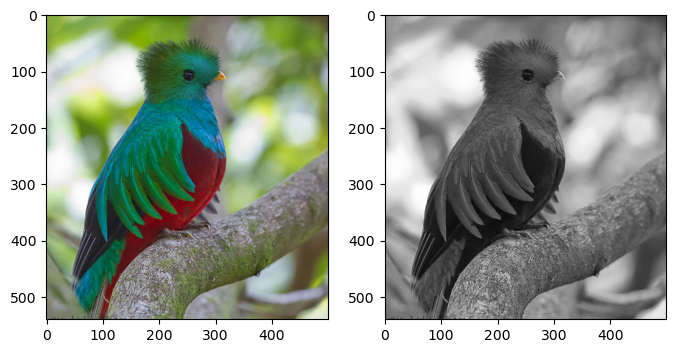

In [4]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(Igray, cmap='gray')
plt.show()

# 2. Descomposición SVD

In [5]:
# convertir los datos a un np.array

X = Igray.copy()
X.shape

(540, 500)

In [6]:
# visualizar una porción de la información
(255 * X[:15,:10]).astype(np.uint8)

array([[153, 154, 154, 152, 152, 152, 152, 151, 151, 151],
       [154, 154, 155, 153, 153, 153, 153, 153, 153, 153],
       [154, 154, 155, 152, 152, 152, 153, 153, 153, 153],
       [153, 154, 154, 152, 152, 153, 153, 153, 153, 154],
       [153, 153, 154, 152, 152, 152, 153, 153, 154, 154],
       [152, 153, 153, 152, 152, 152, 153, 153, 154, 154],
       [149, 152, 153, 153, 154, 154, 154, 155, 156, 156],
       [149, 152, 153, 153, 154, 154, 154, 155, 156, 156],
       [149, 152, 153, 153, 154, 154, 154, 155, 156, 156],
       [148, 151, 152, 153, 154, 154, 154, 155, 156, 156],
       [148, 151, 152, 153, 154, 154, 154, 155, 156, 156],
       [148, 151, 152, 153, 154, 154, 154, 155, 156, 156],
       [148, 151, 152, 153, 154, 154, 154, 155, 156, 156],
       [148, 151, 152, 153, 154, 154, 154, 155, 156, 156],
       [148, 149, 151, 152, 153, 153, 154, 155, 154, 155]], dtype=uint8)

In [7]:
type(X)

numpy.ndarray

In [8]:
# centramos y estandarizamos los datos

mu = X.mean(axis=0)
std = X.std(axis=0)

Xc = (X - mu) / std

In [9]:
# descomposición SVD de Xc
U, S, V = np.linalg.svd(Xc)

In [10]:
print(U.shape, S.shape, V.shape)

(540, 540) (500,) (500, 500)


# 3. Proyección (Grayscale)

In [11]:
# proyección a k componentes

k = 2
Xproj = Xc @ (V[:k,:].T)   
Xproj.shape

(540, 2)

In [12]:
# Reconstrucción

Sig = np.zeros((k,k))
for i in range(0, k):
    Sig[i,i] = S[i]
Rec = U[:,:k] @ Sig @ V[:k,:]
Rec.shape

(540, 500)

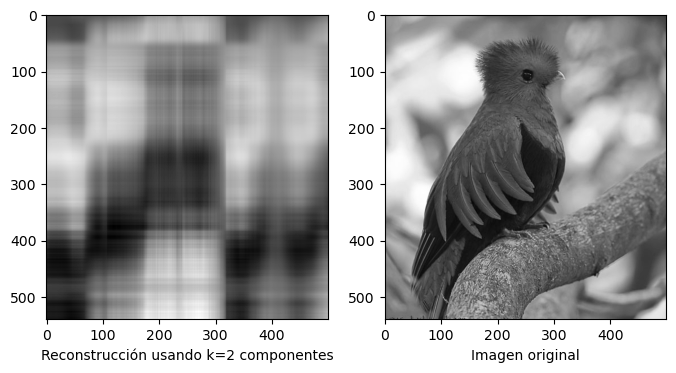

In [13]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(Rec, cmap='gray')
plt.xlabel('Reconstrucción usando k={} componentes'.format(k))
plt.subplot(1,2,2)
plt.imshow(Igray, cmap='gray')
plt.xlabel('Imagen original')
plt.show()

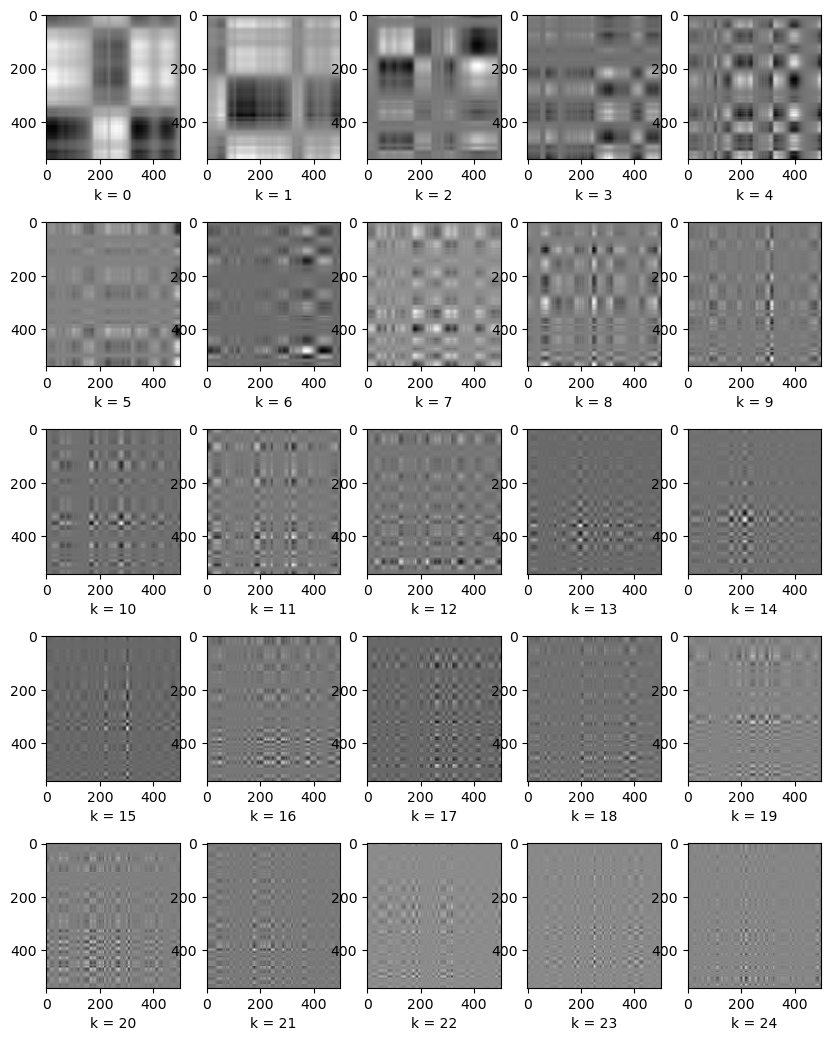

In [14]:
plt.figure(figsize=(10,13))
for i in range(0, 5):
    for j in range(0, 5):
        ell = 5*i+j
        plt.subplot(5, 5, ell+1)
        Approx = U[:,ell].reshape((I.shape[0],1)) @ V[ell,:].reshape((1,I.shape[1]))
        plt.imshow(Approx, cmap='gray')
        plt.xlabel('k = {}'.format(ell))
plt.show()

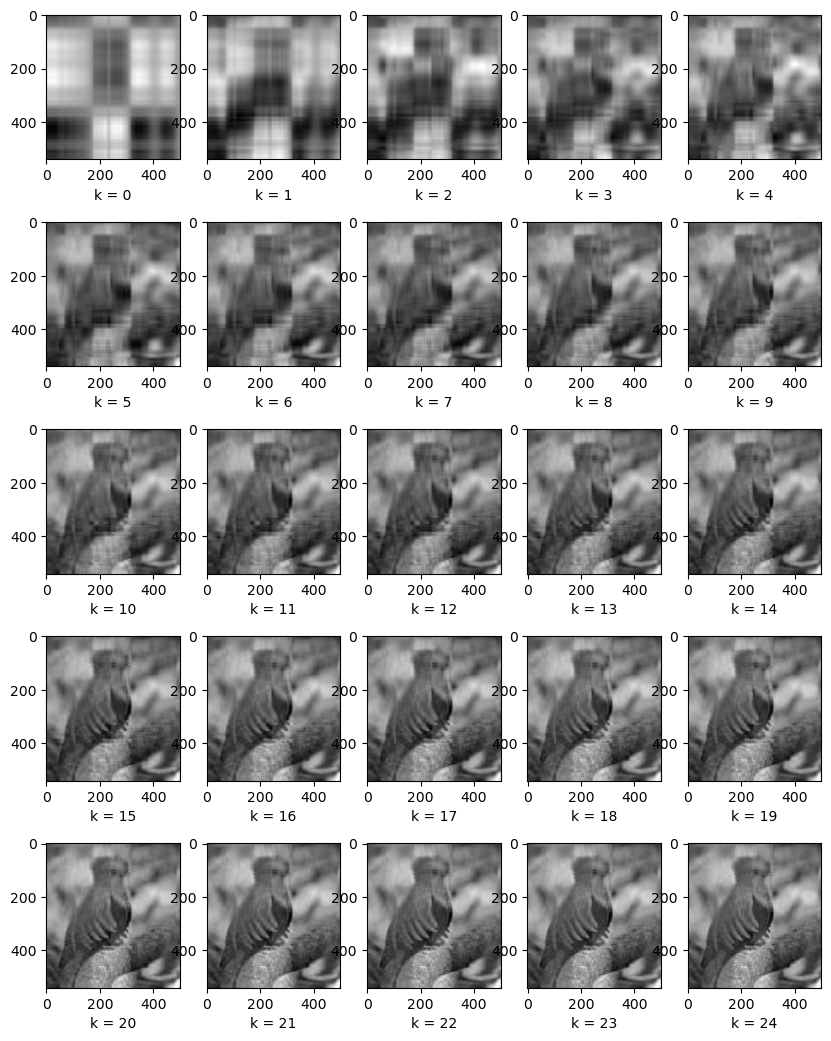

In [15]:
Approx = np.zeros(Igray.shape)

plt.figure(figsize=(10,13))
for i in range(0, 5):
    for j in range(0, 5):
        ell = 5*i+j
        plt.subplot(5, 5, ell+1)
        Approx = Approx + S[ell] * (U[:,ell].reshape((I.shape[0],1)) @ V[ell,:].reshape((1,I.shape[1])))
        plt.imshow(Approx, cmap='gray')
        plt.xlabel('k = {}'.format(ell))
plt.show()

# 5. Cálculo Compresión

In [16]:
bytes_orig = I.shape[0] * I.shape[1]
megas_orig = bytes_orig / (1024**2)

In [17]:
print('bytes original = {}'.format(bytes_orig))
print('megas iriginal = {} Mb'.format(megas_orig))

bytes original = 270000
megas iriginal = 0.2574920654296875 Mb


In [18]:
print('k = {}'.format(k))

k = 2


In [19]:
bytes_red = 4 * ((I.shape[0] * k) + k + (k * I.shape[1]))
megas_red = bytes_red / (1024**2)

In [20]:
print('bytes reducción = {}'.format(bytes_red))
print('megas reducción = {} Mb'.format(megas_red))

bytes reducción = 8328
megas reducción = 0.00794219970703125 Mb


In [21]:
megas_red / megas_orig

0.030844444444444445